# Módulo 5. Redes convolucionales (segunda parte)

¡Bienvenidos al quinto módulo! Tras haber visto en la sesión anterior las redes convolucionales y las técnicas más comunes para reducir el overfitting, en este módulo vamos a ver:


1. **Tranfer learning y Fine-Tuning**

 <ul>
   1.1 Arquitecturas existenes

   1.2 	Modificación en el número de capas congeladas y efecto en los resultados
  </ul>

2. **Data Augmentation**

3.	**Visualización de filtros y activaciones**

 <ul>
   3.1 Visualización de las activaciones de las capas

   3.2 	Visualización de los filtros de las capas convolucionales

   3.3 Visualización de las imágenes que activan una determinada neurona
  </ul>

  3.4 Ejemplos prácticos

4. **Ampliación: Redes neuronales para segmentación**


## **1. Transfer learning y fine-tuning**

En muchas de las aplicaciones en las que queremos proponer una solución basada en aprendizaje profundo, los datos disponibles no son suficientes para obtener un buen modelo de predicción entrenando una CNN desde cero. Las técnicas de ***transfer learning*** y ***fine-tuning*** nos permiten **entrenar modelos precisos con conjuntos de datos limitados (i.e. unas 500-1000 muestras por clase)** evitando tener que:

- Definir la estructura de la red neuronal

- Entrenarla desde cero

Dichas técnicas se basan en **emplear arquitecturas CNN predefinidas** y **que fueron entrenadas en** el conjunto de datos **ImageNet** ofreciendo notables resultados: **ResNet, AlexNet, VGG, Inception, DenseNet, etc**.

Como ya sabéis, las redes se inicializan con unos pesos aleatorios (normalmente) que tras una serie de épocas consiguen tener unos valores que permiten clasificar adecuadamente nuestras imágenes de entrada.

¿Qué pasaría **si pudiésemos inicializar** esos **pesos a unos valores que sabemos que ya son buenos para clasificar un determinado dataset**?

De esta forma, **no necesitaríamos** ni un **dataset tan grande** como el necesario si queremos entrenar una red de cero (de cientos de miles o incluso millones de imágenes podríamos pasar a unas pocas miles) **ni** necesitaríamos **esperar un buen número de épocas a que los pesos cogiesen valores buenos para la clasificación**, lo tendrían mucho más fácil debido a su inicialización. A continuación, vamos a hacer un pequeño repaso de las arquitecturas más conocidas y a poner en práctica las dos técnicas más comunes para realizar lo que buscamos y entender las diferencias entre ellas: **Transfer learning** y **Fine-tuning**.

### 1.1 Arquitecturas existentes

Existen grupos de investigación que dedican su vida a desarrollar arquitecturas que funcionen y entrenarlas en datasets enormes, así que parece lógico aprovecharnos de esto en vez de intentar crear cada vez que tengamos un problema una arquitectura propia, ¿verdad?

Esto, no solo nos va a ahorrar tiempo y dolores de cabeza, si no que nos va a aportar precisión y estabilidad!

Las arquitecturas más comunes hoy en día son:

* VGG
* ResNet
* Inception
* Xception

Vamos a verlas brevemente.

* **VGG16 y VGG19**

Esta arquitectura, que fue una de las primeras en aparecer, fue introducida por Simonyan y Zisserman en 2014 con su paper titulado Very Deep Convolutional Networks for Large Scale Image Recognition, que tenéis disponible aquí: https://arxiv.org/abs/1409.1556.

<img src="https://image.ibb.co/gkEOkJ/imagenet_vgg16.png" alt="imagenet_vgg16" border="0">

Se trata de una arquitectura bastante simple, usando solo bloques compuestos por un número incremental de capas convolucionales con filtros de tamaño 3x3. Además, para reducir el tamaño de los mapas de activación que se van obteniendo, se intercalan bloques maxpooling entre los convolucionales, reduciendo a la mitad el tamaño de estos mapas de activación. Finalmente, se utiliza un bloque de clasificación compuesto por dos capas densas de 4096 neuronas cada una, y una última capa, que es la de salida, de 1000 neuronas.

El 16 y 19 se refiere al número de capas con pesos que tiene cada red (las convolucionales y las densas, las de pooling no se cuentan). Se corresponden con las columnas D y E de la tabla a continuación.

<img src="https://image.ibb.co/cAyikJ/imagenet_vggnet_table1.png" alt="imagenet_vggnet_table1" border="0">

El motivo por el que veis el resto de arquitecturas en la tabla es porque, por aquel entonces, a Simonyan y Zisserman les costó bastante entrenar su arquitectura de forma que convergiera. Como no lo conseguían, lo que se les ocurrió fue entrenar primero redes con arquitecturas más sencillas, y una vez estas convergían y estaban entrenadas, aprovechavan sus pesos para inicializar la siguiente red, que era un poco más compleja, y así hasta llegar a la VGG19. Fijáos la importancia que tiene la inicialización de los pesos, como ya hemos visto. A este proceso se le conoce como "pre-training".

Sin emargo, esto fue en aquellos tiempos, ahora ya no se hace esto, ya que requiere de demasiado tiempo. Ahora podemos conseguir lo mismo utilizando la inicialización de Xavier/Glorot o de He et al., que ya vimos en la sesión 3.

Esta red, sin embargo, tiene un par de desventajas:

* Tarda muchísimo en entrenar
* Tiene un número muy elevado de parámetros

* **ResNet**

La arquitectura de ResNet, desarrollada por He et al. en 2015 (podéis ver su paper llamado "Deep Residual Learning for Image Recognition" aquí: https://arxiv.org/abs/1512.03385), supuso un hito al introducir un tipo de arquitectura exótica basada en "módulos", o como se conoce ahora, "redes dentro de redes".

Estas redes introdujeron el concepto de "conexiones residuales", que podéis ver en la siguiente imagen:

<center><img src="https://image.ibb.co/dXfUQJ/imagenet_resnet_residual.png" alt="imagenet_resnet_residual" border="0"></center>

Estos bloques lo que permiten es que llegue a la capa $l+1$ parte del mapa de activaciones previo sin modificar, y parte modificado por el bloque perteneciente a la capa $l$, como podéis ver en la imágen superior.

En 2016 mejoraron esta arquitectura incluyendo más capas en estos bloques residuales, como podéis observar en la siguiente imagen:

<center><img src="https://image.ibb.co/fmWEsy/imagenet_resnet_identity.png" alt="imagenet_resnet_identity" border="0"></center>

Existen variaciones de ResNet con distinto número de capas, pero la más usada es la ResNet50, que consta de 50 capas con pesos.

Es llamativo que aunque tiene muchas más capas que la VGG, necesita mucha menos memoria, casi 5 veces menos. Eso se debe a que esta red, en vez de capas densas en la etapa de clasificación, utiliza un tipo de capa que se llama GlobalAveragePooling, que lo que hace es convertir los mapas de activacones 2D de la última capa de la etapa de extracción de características a un vector de $n_{classes}$ que se utiliza para calcular la probabilidad de pertenecer a cada clase.

* **Inception V3**

Este tipo de arquitectura, que se introdujo en 2014 por Szegedy et al. en su paper llamado "Going Deeper with Convolutions" (https://arxiv.org/abs/1409.4842), utiliza bloques con filtros de diferentes tamaños que luego concatena para poder extraer características a diferentes escalas. Fijaos en la imagen:

<img src="https://image.ibb.co/mUJusy/imagenet_inception_module.png" alt="imagenet_inception_module" border="0">

Para que lo entendáis, la meta del bloque "inception" es calcular mapas de activaciones con convoluciones de 1x1, 3x3 y 5x5 para conseguir extraer características a diferentes escalas. Luego simplemente se concatenan todos estos mapas de activaciones en uno solo.

Esta arquitectura necesita incluso menos memoria que la VGG y la ResNet.

* **Xception**

Esta arquitectura la propuso François Chollet (el creador de Keras) y lo unico que aporta respecto a Inception es que realiza las convoluciones de una forma óptima para que tarden menos tiempo. Esto lo consigue separando las convoluciones 2D en 2 convoluciones 1D. Si tenéis interés en saber más, aquí tenéis el paper: "Xception: Deep Learning with Depthwise Separable Convolutions", https://arxiv.org/abs/1610.02357.

En términos de memoria es muy similar a la Xception, y este es el esquema de su arquitectura:

<img src="https://image.ibb.co/dpKpQJ/imagenet_xception_flow.png" alt="imagenet_xception_flow" border="0">

Por último, merece la pena hablar también de la SqueezeNet.

* **SqueezeNet**

Esta red es extremadamente ligera (sus pesos ocupan 5MB, en comparación de los 500MB de la VGG, o los 100 de la Inception, por ejemplo) y consigue un accuracy de ~57% rank-1 o ~80% rank-5 con el ImageNet.

¿Qué significa rank-1 y rank-5, o top-1 y top-5? 

* rank-1 accuracy: comparamos si la clase con la mayor probabilidad según nuestra red acierta a la etiqueta real
* rank-5 accuracy: comparamos si una de las 5 clases con mayor probailidad según nuestra red acierta a la etiqueta real

¿Cómo consigue esta red ocupar tan poco y a la vez ser precisa? Pues lo consigue utilizando una arquitectura que "comprime" los datos y después los expande, tal y como podéis ver en la siguiente imagen:

<img src="https://image.ibb.co/dQjpQJ/imagenet_squeezenet_fire.png" alt="imagenet_squeezenet_fire" border="0">


### Comparación de tamaños

<img src="https://image.ibb.co/kUF5jd/net_param_size.png" alt="net_param_size" border="0">

### Comparación del accuracy que consiguen vs. número de parámetros

<img src="https://image.ibb.co/fAqo4d/net_comp_acc_vs_params.png" alt="net_comp_acc_vs_params" border="0">

### Fuentes:

* https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
* https://towardsdatascience.com/neural-network-architectures-156e5bad51ba
* https://medium.com/@siddharthdas_32104/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5

Tenéis que saber que hay infinitas arquitecturas, pero estas son con diferencia las más usadas. Normalmente, ante un problema, no vamos a ponernos a definir nuestra arquitectura, sino que usaremos una de estas arquitecturas.

Ahora que ya hemos visto su aquitectura principal, vamos a ver un ejemplo de cómo podemos implementarlas en Keras

### Ejemplo de clasificación de imágenes con VGG, ResNet, Inception y Xception con Keras

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importamos los paquetes necesarios
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3, Xception, VGG16, VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import urllib
import cv2
import matplotlib.pyplot as plt
import imageio as io

def predict_image(model_name, image_source):
  
  # definimos un diccionario que mapea el nombre de la red con el modelo importado
  # de Keras
  MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception, # TensorFlow solo!
    "resnet": ResNet50
  }

  # establecemos el tamaño de entrada y la función de preprocesamiento de imagen
  # recordad que nosotros por ejemplo haciamos una normalización, pues en Keras
  # están definidas las funciones de pre-procesamiento de cada red, por lo que no
  # tenemos que preocuparnos de nada :)
  input_shape = (224, 224)
  preprocess = imagenet_utils.preprocess_input

  # si usamos InceptionV3 o Xception, necesitamos establecer un tamaño diferente
  # de imagen de entrada (299x299) y usar una función de preprocesamiento diferente
  if model_name in ("inception", "xception"):
    input_shape = (299, 299)
    preprocess = preprocess_input

  print("[INFO] loading {}...".format(model_name))
  Network = MODELS[model_name]
  model = Network(weights="imagenet") # cargamos la red con los pesos ya entrenados con el ImageNet
  # la primera vez que lo ejecutemos Keras se descargará los pesos, que son 500MB 
  # si usamos la VGG o unos 100 en los otros casos, así que es posible que tarde

  # cargamos la imagen y nos aseguramos de que el tamaño es el adecuado
  print("[INFO] loading and pre-processing image...")
  if type(image_source) == str:
    image = load_img(image_source, target_size=input_shape)
    image = np.resize(image, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)
  else:
    image = np.resize(image_source, (input_shape[0], input_shape[1], 3))
    image = img_to_array(image)

  # nuestra imagen es representada como un array de tamaño:
  # (inputShape[0], inputShape[1], 3) 
  # y necesitamos: (1, inputShape[0], inputShape[1], 3)
  # así que expandimos las dimensiones
  image = np.expand_dims(image, axis=0)

  # pre-procesamos la imagen
  image = preprocess(image)

  # predecimos la clase de nuestra imagen
  print("[INFO] classifying image with '{}'...".format(model_name))
  preds = model.predict(image)
  P = imagenet_utils.decode_predictions(preds)

  # mostramos las predicciones rank-5 y su probabilidad
  for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

  img = io.imread(image_source)
  (imagenetID, label, prob) = P[0][0]
  cv2.putText(img, "Label: {}, {:.2f}%".format(label, prob * 100), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
  plt.imshow(img)
  plt.axis('off')
  
  return model

In [ ]:
# download images
!wget https://image.ibb.co/cuw6pd/soccer_ball.jpg
!wget https://image.ibb.co/hdoVFJ/bmw.png
!wget https://image.ibb.co/h0B6pd/boat.png
!wget https://image.ibb.co/eCyVFJ/clint_eastwood.jpg

--2023-01-31 10:50:05--  https://image.ibb.co/cuw6pd/soccer_ball.jpg
Resolving image.ibb.co (image.ibb.co)... 172.96.161.50, 172.96.160.210, 172.96.161.50, ...
Connecting to image.ibb.co (image.ibb.co)|172.96.161.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37935 (37K) [image/jpeg]
Saving to: ‘soccer_ball.jpg’

soccer_ball.jpg     100%[===================>]  37.05K  32.8KB/s    in 1.1s    

2023-01-31 10:50:09 (32.8 KB/s) - ‘soccer_ball.jpg’ saved [37935/37935]

--2023-01-31 10:50:09--  https://image.ibb.co/hdoVFJ/bmw.png
Resolving image.ibb.co (image.ibb.co)... 172.96.161.50, 172.96.160.210, 172.96.161.50, ...
Connecting to image.ibb.co (image.ibb.co)|172.96.161.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347784 (340K) [image/png]
Saving to: ‘bmw.png’

bmw.png             100%[===================>] 339.63K   412KB/s    in 0.8s    

2023-01-31 10:50:11 (412 KB/s) - ‘bmw.png’ saved [347784/347784]

--2023-01-31 10:50:11-- 

In [ ]:
!ls -la *.*

-rw-r--r-- 1 root root 347784 Jun 16  2018 bmw.png
-rw-r--r-- 1 root root 327986 Jun 16  2018 boat.png
-rw-r--r-- 1 root root  36001 Jun 16  2018 clint_eastwood.jpg
-rw-r--r-- 1 root root  37935 Jun 16  2018 soccer_ball.jpg


In [ ]:
model = predict_image('resnet', 'soccer_ball.jpg')

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

[INFO] loading vgg16...
553467096/553467096 [==============================] - 3s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with 'vgg16'...
1/1 [==============================] - 1s 803ms/step
1. convertible: 98.09%
2. sports_car: 0.63%
3. car_wheel: 0.43%
4. amphibian: 0.19%
5. beach_wagon: 0.18%


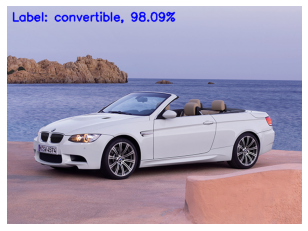

In [ ]:
model = predict_image('vgg16', 'bmw.png')

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[INFO] loading inception...
96112376/96112376 [==============================] - 1s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with 'inception'...
1/1 [==============================] - 2s 2s/step
1. revolver: 85.34%
2. tripod: 4.44%
3. rifle: 0.69%
4. assault_rifle: 0.63%
5. cardigan: 0.37%


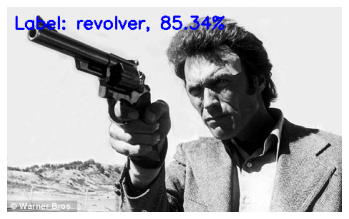

In [ ]:
model = predict_image('inception', 'clint_eastwood.jpg')

In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

[INFO] loading xception...
91897856/91884032 [==============================] - 1s 0us/step
[INFO] loading and pre-processing image...
[INFO] classifying image with 'xception'...
1. wreck: 93.17%
2. seashore: 0.59%
3. gondola: 0.17%
4. sea_lion: 0.14%
5. amphibian: 0.12%


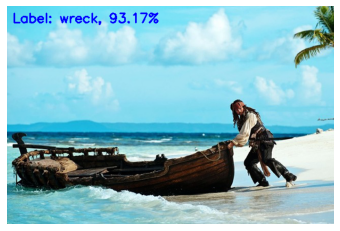

In [ ]:
model = predict_image('xception', 'boat.png')

In [ ]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### 1.2 Modificación en el número de capas congeladas y efecto en los resultados

ImageNet consiste en un dataset de más o menos 1,2 millones de imágenes para entrenamiento, 50.000 para validación y 100.000 para test, pertenecientes a 1000 categorías.

Si recordáis el esquema general de una CNN visto en el módulo anterior, lo que teníamos era un extractor de características en la primera etapa  y después un clasificador, ¿verdad? Mirad:

<img src="https://image.ibb.co/kXj0cd/cnn_feat_class.jpg" alt="cnn_feat_class" border="0" height="250">

Pues, ¿qué os parecería si quitásemos la última capa de alguna de las redes preentrenadas, que simplemente lo que hace es sacar una probailidad para cada una de las 1000 clases del ImageNet, y la sustituyésemos por una capa ad-hoc a nuestra aplicación con tantas neuronas como clases en las que queremos clasificar? ¡De esta forma, podríamos aprovechar todo el conocimiento que adquirieron los filtros involucrados en la CNN cuando fue entrenada en el conjunto de datos ImageNet y aplicarlo a nuestro problema!

Vamos a ver como se haría esto para la red VGG16. Recordad su arquitectura:

<img src="https://image.ibb.co/h9Gpay/imagenet_vgg16.png" alt="imagenet_vgg16" border="0">

Como hemos visto, lo que haremos será cambiar la etapa de clasificación, para que la última capa sea una de 10 neuronas (nuestro CIFAR 10 tiene 10 clases) y luego re-entrenaremos la red permitiendo que se modifiquen los pesos de las capas fully connected, es decir, **de la etapa de clasificación**. Para esto, inicializariamos nuestra red con los pesos de ImageNet, y luego **congelaríamos** todas las capas convolucionales y de max pooling para que no modificasen sus pesos, dejando solo libres las fully connected.

Una vez hecho eso, empezaríamos a re-entrenar. De esta forma, logramos aprovechar la etapa de extracción de características de nuestra red, y solamente *afinamos* el clasificador final para que funcione mejor con nuestro dataset. **Esto es lo que se conoce como Transfer Learning, porque aprovechamos conocimiento de otro problema para solucionar el que tenemos entre manos nosotros.**

De hecho, este enfoque se puede hacer también guardándonos las características que da la última capa de max pooling, y luego metiendo esos datos a cualquier clasificador (SVM, logreg, etc).

Veamos cómo podríamos hacerlo:

In [ ]:
# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)
# importamos lo necesario
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

input_shape = (48, 48, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [ ]:
# construimos el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
# congelamos todas las capas de nuestro base_model para que no se entrenen
# queremos que nuestro feature extractor siga igual que antes => transfer learning
for layer in base_model.layers: 
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# vemos la estructura del modelo
model.summary()

Capa input_5 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Capa block5_conv1 congelada.
Capa block5_conv2 congelada.
Capa block5_conv3 congelada.
Capa block5_pool congelada.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64) 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# comenzamos con el entrenamiento
epochs = 10
batch_size = 256

# como entrenariamos normalmente
model.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_data=(X_test_resized, Y_test),
          epochs=epochs)

Epoch 1/10
196/196 [==============================] - 21s 96ms/step - loss: 1.7868 - accuracy: 0.3561 - val_loss: 1.6714 - val_accuracy: 0.3967
Epoch 2/10
196/196 [==============================] - 19s 99ms/step - loss: 1.6436 - accuracy: 0.4123 - val_loss: 1.6138 - val_accuracy: 0.4274
Epoch 3/10
196/196 [==============================] - 16s 84ms/step - loss: 1.6030 - accuracy: 0.4271 - val_loss: 1.5891 - val_accuracy: 0.4322
Epoch 4/10
196/196 [==============================] - 16s 83ms/step - loss: 1.5689 - accuracy: 0.4398 - val_loss: 1.5807 - val_accuracy: 0.4343
Epoch 5/10
196/196 [==============================] - 16s 84ms/step - loss: 1.5456 - accuracy: 0.4494 - val_loss: 1.5589 - val_accuracy: 0.4447
Epoch 6/10
196/196 [==============================] - 17s 85ms/step - loss: 1.5238 - accuracy: 0.4580 - val_loss: 1.5401 - val_accuracy: 0.4489
Epoch 7/10
196/196 [==============================] - 17s 85ms/step - loss: 1.5066 - accuracy: 0.4617 - val_loss: 1.5304 - val_accuracy:

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

¿Sorprendente, no creéis? ¡No hemos tenido que entrenar nada, y no hemos obtenido unos resultados tan malos! Tened en cuenta que si lo hiciésemos aleatoriamente la probabilidad de acertar sería de 1/10=0.1 o un 10%, ya que tenemos10 clases. De hecho, cuanto más parecidos sean el dataset sobre el que ha sido entrenada originalmente la red y el dataset de nuestro problema, mejores resultados obtendremos.

Sin embargo, la técnica de transferencia del conocimiento, es bastante simple y para problemas más complicados no ofrece muy buenos resultados. La idea ahora es **re-entrenar aparte del *top-model* algunos bloques convolucionales del *base_model***. Esta sutil diferencia hace que en vez de estar haciendo transfer learning estemos haciendo **fine-tuning**. 

## ¿Cuándo se hace fine tuning y cuándo transfer learning? ¿Cómo elijo desde qué capa re-entrenar?

Bien, como norma general, lo primero que haremos será transfer learning, es decir, no re-entrenaremos nuestra red. Eso nos dará un *baseline* que tendremos que superar. Después, re-entrenaremos solo la etapa de clasificación, y después podemos probar a re-entrenar también algún bloque convolucional.

**Receta**
* Hacer **transfer learning**, es decir, modificar solo la última capa para que tenga el número de salidas igual a nuestras clases (*baseline*).
* Probar a re-entrenar la etapa de clasificación, es decir, además de la última capa (de clasificación) también las capas densas.
* Probar a re-entrenar algún bloque convolucional. Normalmente lo que se suele hacer es ir **re-entrenando bloques convolucionales de atrás hacia delante**, es decir, en una primera ejecución re-entrenaríamos el último bloque convolucional y si vemos gráficamente que el *accuracy* finaliza con una tendencia alcista y sin presentar signos de *overffiting* vamos re-entrenando hacia detrás, i.e. en la siguiente ejecución re-entrenariamos el último bloque convolucional y el penúltimo y así sucesivamente. Recordad que los primeros bloques de una red convolucional están entrenados para extraer características más generales como bordes etc. que son comunes a todas las imágenes. Los bloques convolucionales posteriores extraen características más especializadas de la tarea en cuestión.

Siguiendo esos pasos, la mayoría de  veces llegaréis a un resultado adecuado para vuestro problema.

También depende del tipo de problema que tengáis. Por ejemplo, si...

* **el nuevo dataset es pequeño y parecido al original**: cuidado al hacer fine-tuning, quizás sea mejor escoger las características de la ultima capa de la etapa convolucional y usar un SVM o clasificador lineal
* **el nuevo dataset es grande y parecido al original**: al tener más datos probablemente no incurramos en over-fitting, así que podemos hacer fine-tuning con más confianza
* **el nuevo dataset es pequeño y muy diferente al original**: lo mejor sería usar características de una capa más temprana de la etapa convolucional, ya que ésta se fijará en patrones más generales que las últimas capas, y luego emplear un clasificador lineal
* **el nuevo dataset es grande y muy diferente al original**: dale matraca a esa red, entrenala desde el principio! o como se dice en inglés, from scracth! De todas formas, sigue siendo recomendable que inicialices los pesos con los del ImageNet.


**NOTA:**

Cuando uséis alguna de estas técnicas debéis tener en cuenta las posibles restricciones de los modelos preentrenados. Por ejemplo, pueden exigir un tamaño mínimo de imagen. Además, cuando se re-entrenan redes, se suelen escoger learning rates más bajos que si lo hacemos desde cero, ya que partimos de una inicialización de pesos que se presupone buena.






Vamos a pácticar la técnica de **fine-tuning** con un ejemplo.

Recordad de nuevo la arquitectura de la VGG16:

<img src="https://image.ibb.co/h9Gpay/imagenet_vgg16.png" alt="imagenet_vgg16" border="0">

Lo que hicimos en el ejemplo anterior fue cambiar solo las capas de la etapa de clasificación, quedándonos con el conocimiento que obtuvo la red a la hora de extracción de características (patrones) en la tarea anterior, de la que estamos cargando los pesos (ImageNet).

Con el **fine-tuning** no estamos limitados a re-entrenar solo la etapa de clasificador (es decir, las capas fully connected), sino que lo que haremos será re-entrenar también la etapa de extracción de características, es decir, las capas convolucionales y de pooling.

Es imporante que tengáis en cuenta lo que hablamos cuando vimos las capas convolucionales: en una red, las primeras capas detectan patrones más sencillos y generales, y cuanto más avanzamos en la arquitectura, más específicos al dataset y más complicados van siendo los patrones que detectan.





In [ ]:
# Ejemplo fine-tuning etapa clasificación VGG16 con CIFAR 10
# importamos lo necesario
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [ ]:
# creamos el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [ ]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# vemos la nueva estructura del modelo
model.summary()

Capa input_6 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# comenzamos con el entrenamiento
epochs = 15
batch_size = 256

# como entrenariamos normalmente
model.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_data=(X_test_resized, Y_test),
          epochs=epochs)

Epoch 1/15
196/196 [==============================] - 22s 102ms/step - loss: 1.7668 - accuracy: 0.3399 - val_loss: 1.4871 - val_accuracy: 0.4641
Epoch 2/15
196/196 [==============================] - 20s 101ms/step - loss: 1.4269 - accuracy: 0.4909 - val_loss: 1.4104 - val_accuracy: 0.4941
Epoch 3/15
196/196 [==============================] - 19s 99ms/step - loss: 1.3274 - accuracy: 0.5268 - val_loss: 1.3552 - val_accuracy: 0.5195
Epoch 4/15
196/196 [==============================] - 19s 96ms/step - loss: 1.2390 - accuracy: 0.5607 - val_loss: 1.3071 - val_accuracy: 0.5362
Epoch 5/15
196/196 [==============================] - 19s 97ms/step - loss: 1.1935 - accuracy: 0.5740 - val_loss: 1.3456 - val_accuracy: 0.5254
Epoch 6/15
196/196 [==============================] - 19s 98ms/step - loss: 1.1325 - accuracy: 0.5979 - val_loss: 1.2758 - val_accuracy: 0.5508
Epoch 7/15
196/196 [==============================] - 19s 99ms/step - loss: 1.0826 - accuracy: 0.6148 - val_loss: 1.2889 - val_accurac

In [ ]:
# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 8s 838us/step
Test loss: 1.561372169303894
Test accuracy: 0.5458999872207642


**Esto que acabo de contaros es el santo grial del deep learning, que no se os olvide! Repetid conmigo:**

### El fine tuning es mi mejor amigo. Nunca pasaré de él. Empezaré con un baseline que luego intentaré mejorar.



## **2. Data augmentation**

Acabamos de ver el fine tuning, que es muy útil cuando nuestros datasets no son muy grandes y estamos limitados por el número de imágenes que tenemos disponibles. Pero no os he contado todo lo que se puede hacer...

**Hay otra forma, muy potente, de conseguir mejores resultados, sobretodo si nuestro dataset es limitado!**

Esta técnica se llama **data augmentation**, probablemente porque lo que hace es sacar más datos a partir de los que tenemos disponibles. Básicamente, lo que hacemos es girar/trasladar/emborronar/cambiar el color/acercar o alejar/lo que se os ocurra las imagenes que tenemos. De esta forma, damos lugar a muchas más imágenes de las que teníamos inicialmente.

Ahora algún avispado o avispada podría preguntarme: pero y ¿cómo sabemos las clases de esas nuevas imágenes generadas?

Pues, ¡es una muy buena pregunta! De hecho, es algo que tenemos que tener muy en cuenta: **las nuevas imágenes toman la clase de la imagen origen**, con lo cual, **las transformaciones no pueden ser muy exageradas, y mucho menos ocasionar que se parezcan a otra clase!!**

Para llevar a cabo este proceso existe una librería maravillosa en python que se llama imgaug (https://github.com/aleju/imgaug):

Click aquí para ver las posibles transformaciones: https://github.com/aleju/imgaug

In [ ]:
# Ejemplo con data augmentation

# importamos lo necesario
import tensorflow as tf
from tensorflow.keras import callbacks,optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# resize train set
X_train_resized = []
for img in X_train:
  X_train_resized.append(np.resize(img, input_shape) / 255)
  
X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize test set
X_test_resized = []
for img in X_test:
  X_test_resized.append(np.resize(img, input_shape) / 255)
  
X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(50000, 48, 48, 3)
(10000, 48, 48, 3)


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# data generators => hacemos data augmentation
print('Usando real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen_train = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    zoom_range=0.1,  # set range for random zoom
    horizontal_flip=True)  # randomly flip images
datagen_train.fit(X_train_resized)

datagen_test = ImageDataGenerator()
datagen_test.fit(X_test_resized)

# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# vemos la estructura del modelo
model.summary()

Usando real-time data augmentation.
Capa input_4 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
___________________________________________________________

In [ ]:
X_train_resized.shape[0]

50000

In [ ]:
# comenzamos con el entrenamiento
epochs = 15
batch_size = 256
train_steps_per_epoch = X_train_resized.shape[0] / batch_size
test_steps_per_epoch = X_test_resized.shape[0] / batch_size

# entrenamos con el datagenerator (nos permite aplicar transformaciones en tiempo real)
model.fit_generator(datagen_train.flow(X_train_resized, Y_train, batch_size=batch_size),
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=datagen_test.flow(X_test_resized, Y_test, batch_size=batch_size),
                    validation_steps=test_steps_per_epoch,
                    workers=8)

# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/15
196/195 [==============================] - 64s 324ms/step - loss: 1.7574 - accuracy: 0.3538 - val_loss: 1.4981 - val_accuracy: 0.4507
Epoch 2/15
196/195 [==============================] - 61s 311ms/step - loss: 1.5183 - accuracy: 0.4555 - val_loss: 1.3839 - val_accuracy: 0.4692
Epoch 3/15
196/195 [==============================] - 62s 314ms/step - loss: 1.4491 - accuracy: 0.4804 - val_loss: 1.8391 - val_accuracy: 0.5005
Epoch 4/15
196/195 [==============================] - 64s 327ms/step - loss: 1.4089 - accuracy: 0.4939 - val_loss: 0.9573 - val_accuracy: 0.4904
Epoch 5/15
196/195 [==============================] - 65s 330ms/step - loss: 1.3838 - accuracy: 0.5086 - val_loss: 1.6288 - val_accuracy: 0.4843
Epoch 6/15
196/195 [==============================] - 62s 317ms/step - loss: 1.3586 - accuracy: 0.5157 - val_loss: 1.9959 - val_accuracy: 0.5119
Epoch 7/15
196/195 [==============================] - 62s 318ms/step - loss: 1.3306 - accuracy: 0.5252 - val_loss: 1.3406 - val_ac

## **3. Visualización de activaciones y filtros**

Ahora que ya comocemos cómo funcionan las redes neuronales y hemos entrenado varias CNN, vamos a intentar entender un poco más en profundidad que ocurre dentro de una CNN. 

La mayoría de la gente considera que las redes neuronales son una caja negra, pero eso es por dos cosas:

* No entienden el back-propagation
* Nunca han visualizado *el estado* de sus redes neuronales

Nosotros ya sabemos como funciona el back-propagation, pero todavía no hemos visualizado nada. ¡Así que vamos a por ello!

Primero, ¿qué es lo que podemos visualizar?

* **Los mapas de las activaciones de las capas**
* **Los filtros de nuestras capas convolucionales**
* **Qué imágenes dan la máxima activación para cada clase de nuestro dataset**

### 3.1 Visualización de las activaciones de las capas

Esto es de lo mejorcito que podemos hacer para entender cómo funciona nuestra red.

Las activaciones de las capas son simplemente los resultados que obtenemos a la salida de cada capa durante la forward pass. Normalmente, cuando visualizamos las activaciones de una red con activaciones de tipo ReLU, necesitamos unas cuantas épocas antes de empezar a ver algo útil.

Una cosa para la que son muy útiles es para ver si algún filtro está completamente negro para diferentes entradas, es decir, todos sus elementos son siempre 0. Esto significa que el filtro está *muerto*, y normalmente pasa cuando entrenamos con learning rates altos.

Aquí podéis ver unos ejemplos:

<img src="https://image.ibb.co/j1Jkfy/vis_act1.jpg" alt="vis_act1" border="0" height="400">
<img src="https://image.ibb.co/eauQfy/vis_act2.jpg" alt="vis_act2" border="0" height="400">

Estos ejemplos se corresponden con las activaciones típicas de la primera capa convolucional (izqda) y de la quinta (dcha) de la red AlexNet entrenada cuando ve una imagen de un gato.


### 3.2 Visualización de los filtros de las capas convolucionales

Otra cosa que podemos visualizar para ver cómo funciona nuestra red neuronal convolucional, son los filtros que ha aprendido. Normalmente, estos filtros son más interpetables en las primeras capas de la red que en las últimas. Sobretodo, es útil visualizar los filtros de la primera, que está mirando directamente a las imágenes de entrada.

Fijaos, a continuación podéis ver los filtros de la primera y la segunda capa convolucional de la AlexNet.

<img src="https://image.ibb.co/g2H0DJ/vis_filt1.jpg" alt="vis_filt1" border="0" height="400">
<img src="https://image.ibb.co/h9L97d/vis_filt2.jpg" alt="vis_filt2" border="0" height="400">

Y quizás os estéis preguntando, ¿de qué os sirve visualizar estos filtros?

Pues porque normalmente, una red bien entrenada tendrá filtros perfectamente definidos, al menos en las primeras capas, y sin practicamente ruido. Si os fijáis, es el caso de la imagen de ejemplo.

Si por el contrario tuviésemos filtros con mucho ruido podría deberse a que hace flata entrenar más la red, o a que tenemos overfitting y necesitamos algún método de regularización.

Los filtros de la segunda capa son menos indicativos, pero aún así, se puede intuir que no tienen ruido. Esto lo veremos mejor con el ejemplo que haremos luego.

### 3.3 Visualización de las imágenes que más activan una determinada neurona (clase de nuestro dataset)

Por último, otra cosa que puede ayudaros a decidir si vuestra red está funcionando bien o no es visualizar las imágenes que más activan cada neurona de salida, lo que equivale a visualizar las imágenes que más se acercan a cada clase de vuestro dataset.

Para ello, se suele coger un buen dataset de imágenes y pasárlas a la red mientras se lleva un histórico de qué imágenes activan más una determinada neurona. Así, luego podemos visualizar las imágenes que más han activado esa neurona, además de su *receptive field*.

A continuación podéis ver las imágenes que más activan algunas de las neuronas de la capa POOL5 de AlexNet. El recuadro blanco muestra el receptive field.

<img src="https://image.ibb.co/cdPfDJ/vis_pool5max.jpg" alt="vis_pool5max" border="0" height="400">

Podéis apreciar como el campo receptivo es bastante grande, y que algunas neuronas reaccionan más a partes de cuerpo, textos, etc.


## 3.4 Ejemplos prácticos


###  **Visualización de activaciones de capas**


Puede ser beneficioso visualizar lo que valora la Red Neuronal Convolucional cuando realiza una predicción, ya que nos permite ver si nuestro modelo va por buen camino, así como qué rasgos considera importantes. Por ejemplo, a la hora de determinar si una imagen es humana o no, nuestro modelo puede encontrar que los rasgos faciales son determinantes.

Para visualizar el mapa de calor, utilizaremos una técnica llamada Grad-CAM (Gradient Class Activation Map). La idea que hay detrás es bastante sencilla: para averiguar la importancia de una determinada clase en nuestro modelo, simplemente tomamos su gradiente con respecto a la capa convolucional final y luego lo sopesamos con la salida de esta capa.

Este es el esquema de uso de Grad-CAM:

1) Calcular la salida del modelo y la salida de la última capa convolucional para la imagen en la que queremos calcular el mapa de activación (se puede sacar en otras capas convolucionales).
2) Encontrar el índice de la clase que ha predicho el modelo dada la imagen.
3) Calcular el gradiente de la clase predicho con respecto a la última capa convolucional.
4) Promediarlo y luego ponderarlo con la última capa convolucional (multiplicarlos).
5) Normalizar entre 0 y 1 para la visualización.
6) Convertir a RGB y superponerlo a la imagen original.



In [4]:
# Importamos las librerías necesarias
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from vis.utils import utils
from tensorflow.keras import activations

In [5]:
# Construimos el modelo, en este caso VGG16 con los pesos de imagenet
model = VGG16(weights='imagenet', include_top=True)

# Compilamos el modelo
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

553467096/553467096 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [ ]:
# Hacemos los imports necesarios para calcular los Grand-Cams
from tensorflow.python.ops.gradients_impl import image_grad
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # cv2.imshow does not work on Google Colab notebooks, which is why we are using cv2_imshow instead


def Grad_CAMs (img, model, layer, INTENSITY):
  # Procesamos la imagen
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  # Calculamos los gradientes
  with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer(layer)
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    # Clase predicha (aqui podemos cambiarlo por la clase que me interese)
    class_predict= np.argmax(model_out[0])
    class_out = model_out[:,class_predict]
    grads = tape.gradient(class_out, last_conv_layer) 
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
  heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = heatmap.reshape((14, 14))

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
  image_grad = heatmap * INTENSITY + img
  return heatmap, image_grad, class_predict


Vamos a ver un ejemplo con dos imágenes reales para ver dónde se está fijando la red:

(-0.5, 223.5, 223.5, -0.5)

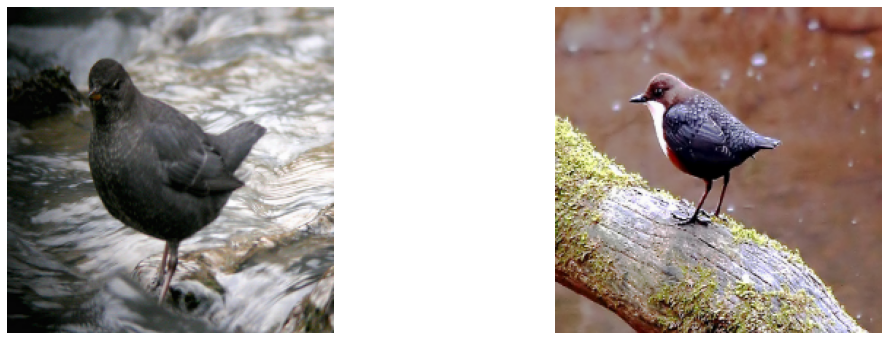

In [11]:
# imports necesarios
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6) # tamaño de las imágenes

img1 = utils.load_img('https://image.ibb.co/ma90yJ/ouzel2.jpg', target_size=(224, 224))
img2 = utils.load_img('https://image.ibb.co/djhyky/ouzel1.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[0].grid(False)
ax[0].axis('off')
ax[1].imshow(img2)
ax[1].grid(False)
ax[1].axis('off')


A la función `Grad_CAMs` tenemos que pasarle el modelo,  la capa para la que queremos ver las activaciones, la imagen para la que queremos ver las activaciones y la intensidad con la que queremos ponderar el mapa de activaciones.
    
En este caso, la clase para que las que queremos ver las activaciones es la clase predicha (aunuqe nosotros también le podríamos introducir el id de la clase que queremos ver las activaciones. Y qué es eso del id de la clase para la que queremos ver las activaciones? Pues que en el caso de la VGG16 con los pesos de la ImageNet, la clase pájaro es la 20, por lo cual, si le metemos una imagen de un pájaro, debería activarse bastante, e indicarnos en qué se fija para decidir que efectivamente es un pájaro. Si le metiésemos un 64, buscaría una green mamba, que es una serpiente por lo que las activaciones deberían ser mucho menores.

<img src="https://www.rspb.org.uk/globalassets/images/wildlife/birds/dipper/1040843-dipper.jpg" border="0" height="180">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Eastern_Green_Mamba_02.jpg/220px-Eastern_Green_Mamba_02.jpg" border="0" height="180">

Tenéis el listado completo de las 1000 clases aquí: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

Vamos entonces a ver las activaciones para nuestras dos imágenes de prueba!

Clase predicha para la primera imagen:20


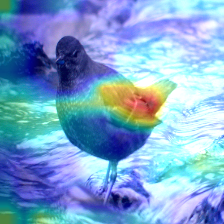

Clase predicha para la segunda imagen:20


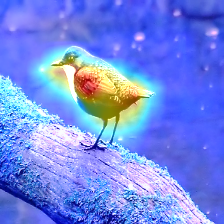

In [ ]:
heatmap_1, imagen_1, class_out_1 = Grad_CAMs (img1, model,'block5_conv3', 0.5)
heatmap_2, imagen_2, class_out_2 = Grad_CAMs (img2, model,'block5_conv3', 0.5)

print("Clase predicha para la primera imagen:" + str(class_out_1))
cv2_imshow(imagen_1)
print("Clase predicha para la segunda imagen:" + str(class_out_2))
cv2_imshow(imagen_2)

### **Visualización de filtros**

Me genero unas funciones que voy a utilizar posteriormente:

In [6]:
def create_image ():
  return tf.random.uniform((224,224,3), minval=-0.5, maxval=0.5)

def plot_image (image, title= 'random'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

In [7]:
import tensorflow as tf
def visualize_filter (layer_name, f_index= None, iters=50, conv=1):
  submodel= tf.keras.models.Model (model.input, model.get_layer(layer_name).output)
  num_filters=submodel.output.shape[-1]
  if f_index is None:
    f_index= random_randint(0, num_filters -1)
  assert num_filters> f_index, "f_index is out of bounds"
  image= create_image()
  verbose_step = int(iters/10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      if conv==1:
      # Para capas convolucionales
        out =submodel(tf.expand_dims(image, axis=0))[:,:,:, f_index]
      else:
      #Para capas lineales
        out =submodel(tf.expand_dims(image, axis=0))[:, f_index]
      loss = tf.math.reduce_mean(out)
    grads= tape.gradient (loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads *10

    #if (i + 1) % verbose_step ==0:
      #print(f' Iteration: {i +1}, Loss: {loss.numpy(): .4f}')
  plot_image(image, f'{layer_name}, {f_index}')


En primer lugar, vamos a ver qué filtros se utilizan para detectar a los pájaros anteriores:

In [8]:
print([layer.name for layer in model.layers])

['input_1', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool', 'flatten', 'fc1', 'fc2', 'predictions']


In [ ]:
from vis.utils import utils
from tensorflow.keras import activations
# Podemos cambiar la función de softmax a lineal para que no nos de probabilidades
model.layers[-1].activation = activations.linear
model = utils.apply_modifications(model)
model.summary()

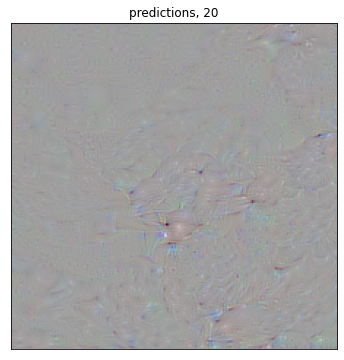

In [12]:
layer_name ='predictions'
visualize_filter(layer_name, f_index=20, iters=100, conv=0)

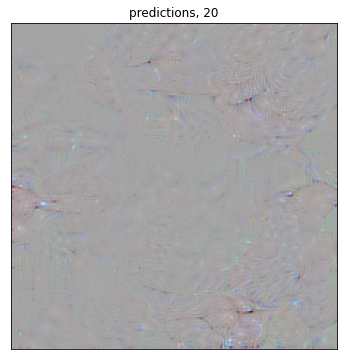

In [ ]:
# visualizar de forma más precisa aumentando las iteraciones del optimizador
layer_name ='predictions'
visualize_filter(layer_name, f_index=20, iters=500, conv=0)

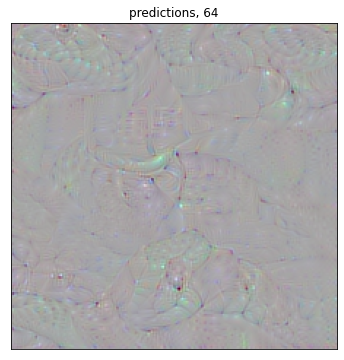

In [13]:
# veamos ahora los patrones que permiten detectar la serpiente (green mamba, índice 64 de ImageNet)
layer_name ='predictions'
visualize_filter(layer_name, f_index=64, iters=500, conv=0)

Ahora, vamos a ver las visualizaciones de algunos de los filtros de la primera capa convolucional:

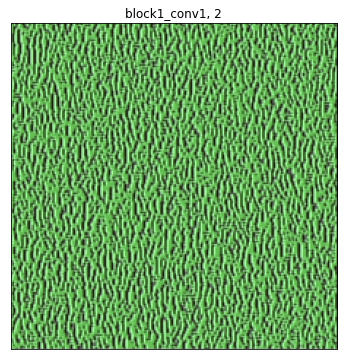

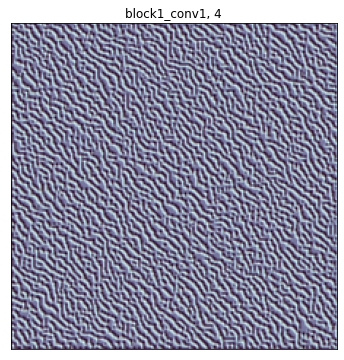

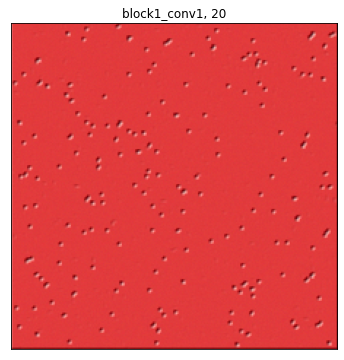

In [14]:
layer_name ='block1_conv1'
filtros =[2,4,20]
for i in filtros:
  visualize_filter(layer_name, f_index=i, iters=500, conv=1)

Vamos a ver ahora filtros de diferentes capas:

In [15]:
import numpy as np
selected_indices = []
for layer_name in ['block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']:
    layer_idx = utils.find_layer_idx(model, layer_name)
    # seleccionamos aleatoriamente 4 filtros de cada capa
    submodel= tf.keras.models.Model (model.input, model.get_layer(layer_name).output)
    num_filters=submodel.output.shape[-1]
    filters = np.random.permutation(num_filters)[:4]

    # generamos el mapa de activaciones
    vis_images = []
    for idx in filters:
        visualize_filter(layer_name, f_index=idx, iters=500, conv=1)

Output hidden; open in https://colab.research.google.com to view.